#### Minimum Working Manual:
- download a CSV file containing TESS alerts (from tev.mit.edu) and save it in `data/`
- Adjust the parameters (see below) to your needs
- execute the cells in this notebook 

In [10]:
import astroplan
import numpy as np
from astroquery.mast import Catalogs
from astroplan.plots import plot_airmass
from observability import *
from IPython.core.display import display, HTML

apply some convenient ipython magic

In [11]:
%load_ext autoreload
%autoreload 2

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_columns', 500)
pd.set_option('precision',2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Specify Parameters

In [27]:
alertsFile = 'data/toi-2019-04-11.csv'    # path to the alerts file
lastUpdate = '2019-03-01'                 # include only alerts added after this date
earliestObs = str(np.datetime64('today')) # earliest time we are interested in for observations
latestObs = '2019-12-30 12:00'            # latest time we are interested in for observations
minAltitude = 30                          # minimum elevation for visibility [deg]
Teff_max = 4000                           # maximum temperature for the M-dwarf-filter [K]
CAHA = defineCAHA()                       # define observing location

### Read alerts
Specify minimum time in column "Updated" (=last time we checked)

In [28]:
alerts, targets = targetsFromCSV(alertsFile, minUpdated=lastUpdate)
alerts

,src,tic_id,toi_id,Disposition,RA,Dec,Tmag,Tmag Err,Epoc,Epoc Err,Period,Period Err,Duration,Duration Err,Transit Depth,Transit Depth Err,Sectors,Created,Updated
0,qlp,207110080,558.01,PC,42.29,-58.02,10.99,0.02,1361.01,0.00e+00,14.55,0.00e+00,3.23,3.23e-01,4080.00,0.00,NaN,2019-04-04 21:06:23.796568+00:00,2019-04-04 21:10:14.936081
1,spoc,311183180,550.02,PC,55.03,5.87,9.00,0.02,1447.40,4.42e-04,10.04,6.10e-04,3.10,3.90e-02,21393.23,234.72,5,2019-02-26 16:21:13.818196+00:00,2019-04-03 16:51:05.473436
2,spoc,311183180,550.01,PC,55.03,5.87,9.00,0.02,1439.59,2.38e-04,13.25,3.28e-04,3.26,2.14e-02,24779.05,139.71,5,2019-02-26 16:21:13.802320+00:00,2019-04-03 16:50:58.733781
3,spoc,325680697,414.01,PC,36.85,-12.04,9.12,0.02,1411.52,3.37e-04,1.82,4.00e-05,1.97,2.94e-02,5926.46,56.52,4,2019-01-31 17:54:52.031947+00:00,2019-03-28 00:11:55.211460
4,spoc,93125144,523.01,PC,84.85,-19.56,9.58,0.02,1472.96,1.17e-03,9.91,1.69e-03,2.98,1.00e-01,6044.13,570.81,6,2019-02-26 17:36:49.734400+00:00,2019-03-28 00:05:29.447104
5,spoc,365690646,524.01,PC,81.54,6.91,10.06,0.02,1471.14,2.41e-03,12.98,3.31e-03,1.53,7.62e-01,1181.00,161.24,6,2019-02-26 17:36:59.570179+00:00,2019-03-28 00:04:19.506361
6,spoc,71512186,525.01,PC,90.17,-8.47,8.77,0.02,1471.04,3.72e-03,14.82,5.28e-03,6.07,6.00e-01,486.16,42.11,6,2019-02-26 17:36:49.384074+00:00,2019-03-27 23:44:38.577676
7,spoc,200593988,526.01,PC,85.34,11.19,12.27,0.04,1470.85,4.32e-03,7.70,3.35e-03,4.38,3.96e-01,8072.47,625.71,6,2019-02-26 17:36:52.902906+00:00,2019-03-27 23:43:19.333798
8,spoc,148228019,527.01,PC,101.19,-36.66,8.24,0.02,1470.74,4.23e-04,18.09,5.98e-04,2.52,4.29e-02,5554.37,72.32,6,2019-02-26 17:36:51.189026+00:00,2019-03-27 23:39:18.495643
9,spoc,238086647,510.01,PC,104.96,-49.51,8.44,0.02,1492.58,1.52e-03,1.35,1.56e-04,0.56,1.51e-01,329.98,44.06,7,2019-03-18 17:05:08.820767+00:00,2019-03-25 21:25:48.822618


### Define Observing Constraints

In [29]:
constraints, start_time, end_time = define_constraints(minAltitude, earliestObs, latestObs)

### Check Observability from CAHA Given the Constraints

In [30]:
observables = check_observability(alerts, constraints, CAHA, targets, Time(earliestObs),
                                 Time(latestObs))
observables

,src,tic_id,toi_id,Disposition,RA,Dec,Tmag,Tmag Err,Epoc,Epoc Err,Period,Period Err,Duration,Duration Err,Transit Depth,Transit Depth Err,Sectors,Created,Updated
1,spoc,311183180,550.02,PC,55.03,5.87,9.00,0.02,1447.40,4.42e-04,10.04,6.10e-04,3.10,0.04,21393.23,234.72,5,2019-02-26 16:21:13.818196+00:00,2019-04-03 16:51:05.473436
2,spoc,311183180,550.01,PC,55.03,5.87,9.00,0.02,1439.59,2.38e-04,13.25,3.28e-04,3.26,0.02,24779.05,139.71,5,2019-02-26 16:21:13.802320+00:00,2019-04-03 16:50:58.733781
3,spoc,325680697,414.01,PC,36.85,-12.04,9.12,0.02,1411.52,3.37e-04,1.82,4.00e-05,1.97,0.03,5926.46,56.52,4,2019-01-31 17:54:52.031947+00:00,2019-03-28 00:11:55.211460
4,spoc,93125144,523.01,PC,84.85,-19.56,9.58,0.02,1472.96,1.17e-03,9.91,1.69e-03,2.98,0.10,6044.13,570.81,6,2019-02-26 17:36:49.734400+00:00,2019-03-28 00:05:29.447104
5,spoc,365690646,524.01,PC,81.54,6.91,10.06,0.02,1471.14,2.41e-03,12.98,3.31e-03,1.53,0.76,1181.00,161.24,6,2019-02-26 17:36:59.570179+00:00,2019-03-28 00:04:19.506361
6,spoc,71512186,525.01,PC,90.17,-8.47,8.77,0.02,1471.04,3.72e-03,14.82,5.28e-03,6.07,0.60,486.16,42.11,6,2019-02-26 17:36:49.384074+00:00,2019-03-27 23:44:38.577676
7,spoc,200593988,526.01,PC,85.34,11.19,12.27,0.04,1470.85,4.32e-03,7.70,3.35e-03,4.38,0.40,8072.47,625.71,6,2019-02-26 17:36:52.902906+00:00,2019-03-27 23:43:19.333798
10,spoc,403693875,528.01,PC,105.01,11.04,13.33,0.06,1469.71,2.00e-03,3.52,6.52e-04,3.10,0.16,21822.78,1004.76,6,2019-02-26 17:37:00.149848+00:00,2019-03-21 14:31:52.049325
11,spoc,438490744,529.01,PC,100.26,16.59,14.28,0.06,1468.50,2.00e-03,1.67,2.83e-04,4.96,0.14,85643.99,2600.05,6,2019-02-26 17:37:01.010676+00:00,2019-03-21 14:31:52.044573
12,spoc,387690507,530.01,PC,103.41,12.88,13.45,0.04,1470.20,2.13e-03,6.39,1.12e-03,2.51,0.19,27555.57,1452.03,6,2019-02-26 17:36:59.937666+00:00,2019-03-21 14:31:52.016553


### Filter for M dwarf Spectral Type

Query TIC on MAST with observable objects, simultaneously filtering by effective temperature

In [32]:
observableMdwarfs = Catalogs.query_criteria(catalog="Tic",Teff=[0,Teff_max], ID=observables.tic_id).to_pandas()
observableMdwarfs

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,objID
0,27649847,20180610,NaN,NaN,512-044161,08132251+1213181,1237667537458692210,J081322.59+121319.1,649852775500351104,41704841,NaN,STAR,2mass,123.34,12.22,tmgaia,94.40,2.0,84.50,2.0,sblink,NaN,NaN,NaN,210.90,23.64,122.81,-7.50,16.27,0.15,14.69,6.60e-02,17.99,1.31e-02,15.44,3.29e-03,14.05,3.35e-03,14.86,1.18e-02,12.24,3.01e-03,10.92,0.02,10.36,0.02,10.09,0.02,AAA-222-111-000-0-0,38.4,9.98,0.02,9.85,0.02,9.73,0.05,9.01,NaN,13.39,6.68e-04,12.43,0.17,cdwrf,cdwrf,3439.0,69.0,4.97,0.44,NaN,NaN,0.27,0.05,0.25,0.06,12.83,6.75,DWARF,9.05e-03,3.17e-03,93.07,NaN,0.03,NaN,20.0,7.42e-04,NaN,NaN,2.54e-03,59095654
1,53593457,20180610,NaN,NaN,NaN,06411343-0355319,NaN,J064113.45-035532.6,3105535545722222720,NaN,NaN,STAR,2mass,100.31,-3.93,tmgaia,19.57,2.0,-65.14,2.0,sblink,NaN,NaN,NaN,215.27,-4.06,101.55,-26.95,19.77,0.16,18.17,2.00e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.37,0.03,12.83,0.03,12.57,0.03,AAA-222-111-000-0-0,13.2,12.41,0.02,12.26,0.02,11.91,NaN,9.08,NaN,16.19,3.16e-03,15.18,0.06,cdwrf,cdwrf,3085.0,99.0,5.08,0.55,NaN,NaN,0.19,0.04,0.16,0.05,22.67,15.51,DWARF,3.04e-03,1.39e-03,NaN,NaN,NaN,NaN,226.0,3.69e-01,NaN,NaN,5.61e-04,197318011
2,55488511,20180610,NaN,NaN,399-004832,03560411-1016192,NaN,J035604.22-101619.2,3193508845448204416,5147691,NaN,STAR,2mass,59.02,-10.27,tmgaia,145.18,2.0,1.15,2.0,sblink,NaN,NaN,NaN,200.84,-43.46,54.23,-29.94,14.83,0.02,13.34,5.00e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.40,0.03,9.78,0.03,9.61,0.02,AAA-222-111-000-0-0,33.2,9.49,0.02,9.48,0.02,9.33,0.04,9.11,0.54,12.44,4.26e-04,11.63,0.04,cdwrf,cdwrf,3883.0,65.0,4.71,0.33,NaN,NaN,0.58,0.08,0.63,0.11,3.22,1.38,DWARF,6.89e-02,1.97e-02,104.15,NaN,0.07,NaN,23.0,3.45e-03,NaN,NaN,1.59e-03,185594741
3,144700903,20180610,NaN,NaN,508-014156,05401918+1133463,NaN,J054019.20+113345.6,3340265713288894848,41468130,NaN,STAR,2mass,85.08,11.56,tmgaia,27.48,2.0,-53.83,2.0,sblink,NaN,NaN,NaN,194.29,-10.07,85.08,-11.79,15.86,0.07,14.41,6.00e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.47,0.02,10.75,0.02,10.59,0.03,AAA-222-111-000-0-0,16.0,10.49,0.02,10.54,0.02,10.44,0.09,8.52,NaN,13.50,7.06e-04,12.66,0.04,cdwrf,cdwrf,3946.0,69.0,4.69,0.33,NaN,NaN,0.61,0.09,0.66,0.11,2.95,1.25,DWARF,8.02e-02,2.28e-02,175.12,NaN,NaN,NaN,124.0,6.55e-02,NaN,NaN,7.27e-04,39361123
4,200593988,20180610,NaN,NaN,506-014168,05412049+1111405,NaN,J054120.55+111140.1,NaN,41468833,NaN,STAR,2mass,85.34,11.19,2mass,79.28,2.0,-33.85,2.0,sblink,NaN,NaN,NaN,194.74,-10.04,85.32,-12.17,15.82,0.05,14.31,5.20e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.92,0.03,10.35,0.02,10.11,0.02,AAA-222-111-000-0-0,14.7,9.97,0.02,9.89,0.02,9.92,0.07,8.98,NaN,NaN,NaN,12.27,0.04,cdwrf,cdwrf,3617.0,67.0,4.81,0.36,NaN,NaN,0.45,0.07,0.48,0.09,5.23,2.44,DWARF,3.12e-02,9.71e-03,111.83,NaN,NaN,NaN,100.0,1.28e-01,NaN,NaN,1.30e-03,39094539
5,218795833,20180610,NaN,NaN,NaN,08182567-1939465,NaN,J081825.63-193946.2,5707485523149430400,NaN,NaN,STAR,2mass,124.61,-19.66,tmgaia,-45.14,2.0,25.22,2.0,sblink,NaN,NaN,NaN,240.60,9.04,132.81,-38.10,17.87,0.17,17.35,2.00e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.85,0.03,12.23,0.03,11.95,0.02,AAA-222-111-000-0-0,12.3,11.79,0.02,11.64,0.02,11.59,0.17,8.75,NaN,15.50,2.04e-03,14.53,0.06,cdwrf,cdwrf,3225.0,100.0,5.00,0.53,NaN,NaN,0.25,0.06,0.23,0.07,14.67,9.82,DWARF,6.14e-03,2.74e-03,155.42,NaN,NaN,NaN,127.0,1.14e-01,NaN,NaN,7.62e-04,220135092
6,237751146,20180610,NaN,NaN,471-024518,06571961+0401442,NaN,J065719.65+040143.6,312821262

### Output

Merge the two tables

In [33]:
observableMdwarfs.rename(columns={'ID' : 'tic_id'}, inplace=True)
observableMdwarfs.tic_id = observableMdwarfs.tic_id.astype('int64')
observableMdwarfs = pd.merge(observables, observableMdwarfs, on='tic_id', how='inner')
candidateTargets = [t for t in targets if float(t.name) in observableMdwarfs.toi_id.unique()]
observableMdwarfs

,src,tic_id,toi_id,Disposition,RA,Dec,Tmag_x,Tmag Err,Epoc,Epoc Err,Period,Period Err,Duration,Duration Err,Transit Depth,Transit Depth Err,Sectors,Created,Updated,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag_y,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,objID
0,spoc,200593988,526.01,PC,85.34,11.19,12.27,0.04,1470.85,4.32e-03,7.70,3.35e-03,4.38,0.40,8072.47,625.71,6,2019-02-26 17:36:52.902906+00:00,2019-03-27 23:43:19.333798,20180610,NaN,NaN,506-014168,05412049+1111405,NaN,J054120.55+111140.1,NaN,41468833,NaN,STAR,2mass,85.34,11.19,2mass,79.28,2.0,-33.85,2.0,sblink,NaN,NaN,NaN,194.74,-10.04,85.32,-12.17,15.82,0.05,14.31,5.20e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.92,0.03,10.35,0.02,10.11,0.02,AAA-222-111-000-0-0,14.7,9.97,0.02,9.89,0.02,9.92,0.07,8.98,NaN,NaN,NaN,12.27,0.04,cdwrf,cdwrf,3617.0,67.0,4.81,0.36,NaN,NaN,0.45,0.07,0.48,0.09,5.23,2.44,DWARF,3.12e-02,9.71e-03,111.83,NaN,NaN,NaN,100.0,1.28e-01,NaN,NaN,1.30e-03,39094539
1,spoc,403693875,528.01,PC,105.01,11.04,13.33,0.06,1469.71,2.00e-03,3.52,6.52e-04,3.10,0.16,21822.78,1004.76,6,2019-02-26 17:37:00.149848+00:00,2019-03-21 14:31:52.049325,20180610,NaN,NaN,506-034631,07000148+1102364,1237679585916093642,J070001.48+110235.9,3158968065621839232,NaN,NaN,STAR,2mass,105.01,11.04,tmgaia,-8.72,2.0,-48.00,2.0,sblink,NaN,NaN,NaN,204.02,6.90,105.04,-11.62,16.36,0.17,14.96,2.00e-01,18.40,1.99e-02,16.19,4.98e-03,13.21,1.02e-03,14.37,6.87e-03,13.97,7.13e-03,12.18,0.02,11.47,0.03,11.35,0.02,AAA-222-111-000-0-0,14.7,11.25,0.02,11.29,0.02,11.16,0.16,8.16,NaN,14.05,9.29e-04,13.33,0.06,cdwrf,cdwrf,3965.0,147.0,4.69,0.38,NaN,NaN,0.61,0.10,0.66,0.12,2.88,1.41,DWARF,8.37e-02,2.73e-02,241.21,NaN,NaN,NaN,122.0,2.20e-01,NaN,NaN,4.23e-04,53658451
2,spoc,438490744,529.01,PC,100.26,16.59,14.28,0.06,1468.50,2.00e-03,1.67,2.83e-04,4.96,0.14,85643.99,2600.05,6,2019-02-26 17:37:01.010676+00:00,2019-03-21 14:31:52.044573,20180610,NaN,NaN,533-031464,06410143+1635229,NaN,J064101.43+163520.6,NaN,NaN,NaN,STAR,2mass,100.26,16.59,2mass,-0.19,2.0,-185.35,2.0,sblink,NaN,NaN,NaN,196.96,5.25,99.89,-6.50,NaN,NaN,17.42,2.00e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.41,0.02,11.87,0.02,11.62,0.02,AAA-222-111-000-0-0,11.5,11.43,0.02,11.23,0.02,11.42,0.23,8.66,NaN,NaN,NaN,14.28,0.06,cdwrf,cdwrf,3021.0,97.0,5.11,0.53,NaN,NaN,0.17,0.04,0.14,0.04,27.12,17.98,DWARF,2.22e-03,9.81e-04,NaN,NaN,NaN,NaN,136.0,1.42e-01,NaN,NaN,1.22e-03,50480724
3,spoc,387690507,530.01,PC,103.41,12.88,13.45,0.04,1470.20,2.13e-03,6.39,1.12e-03,2.51,0.19,27555.57,1452.03,6,2019-02-26 17:36:59.937666+00:00,2019-03-21 14:31:52.016553,20180610,NaN,NaN,515-033797,06533906+1252545,1237679584304628046,J065339.07+125253.9,3353218991064114944,41590686,NaN,STAR,2mass,103.41,12.88,tmgaia,11.81,2.0,-57.63,2.0,sblink,NaN,NaN,NaN,201.67,6.32,103.27,-9.94,16.71,0.04,15.40,1.36e-01,19.03,2.18e-02,16.40,4.07e-03,15.01,3.89e-03,13.96,4.07e-03,13.41,4.48e-03,12.11,0.02,11.47,0.03,11.24,0.02,AAA-222-111-000-0-0,9.9,11.12,0.02,11.09,0.02,10.91,0.14,8.73,0.43,14.45,1.14e-03,13.45,0.04,cdwrf,cdwrf,3688.0,69.0,4.78,0.35,NaN,NaN,0.49,0.07,0.52,0.10,4.54,2.07,DWARF,3.94e-02,1.20e-02,204.36,NaN,NaN,NaN,162.0,2.10e-01,NaN,NaN,5.35e-04,52114783
4,spoc,302895996,531.01,PC,83.12,15.56,13.60,0.06,1468.85,2.16e-03,0.57,1.08e-04,1.41,0.40,5208.55,500.49,6,2019-02-26 17:36:58.034621+00:00,2019-03-21 14:31:52.002678,20180610,NaN,NaN,528-014332,05322799+1533220,NaN,J053227.95+153321.3,3390078778349124736,NaN,NaN,STAR,2mass,83.12,15.56,tmgaia,-48.40,2.0,-52.05,2.0,sblink,NaN,NaN,NaN,189.82,-9.63,83.31,-7.72,16.71,0.

Display columns relevant for candidates spreadsheet

In [34]:
to_spreadsheet = observableMdwarfs[['tic_id', 'toi_id', 'RA', 'Dec', 'Teff']]
to_spreadsheet

,tic_id,toi_id,RA,Dec,Teff
0,200593988,526.01,85.34,11.19,3617.0
1,403693875,528.01,105.01,11.04,3965.0
2,438490744,529.01,100.26,16.59,3021.0
3,387690507,530.01,103.41,12.88,3688.0
4,302895996,531.01,83.12,15.56,3462.0
5,144700903,532.01,85.08,11.56,3946.0
6,431999925,513.01,120.79,-20.01,3266.0
7,318937509,516.01,112.38,2.85,3109.0
8,218795833,519.01,124.61,-19.66,3225.0
9,27649847,521.01,123.34,12.22,3439.0


Print StarAlt-suited coordinate output for candidates

In [35]:
coordList = [print('{} {} {}'.format(o.tic_id, o.ra, o.dec)) for i, o in observableMdwarfs.iterrows()]

200593988 85.3354 11.1946
403693875 105.0062 11.0435
438490744 100.256 16.5896
387690507 103.4128 12.8818
302895996 83.1166 15.5561
144700903 85.0799 11.5629
431999925 120.7896 -20.0098
318937509 112.3815 2.8481
218795833 124.607 -19.6629
27649847 123.3438 12.2217
55488511 59.0172 -10.272
237751146 104.3317 4.029
53593457 100.306 -3.9255
452866790 120.5953 3.3388
348538431 121.6294 -15.7646


check elevation at CAHA of the targets _tonight_

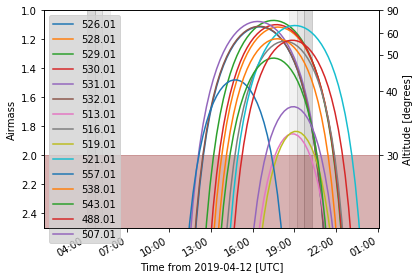

In [37]:
fig, ax = plt.subplots()
ax = plot_airmass(candidateTargets, CAHA, str(np.datetime64('now')), brightness_shading=True,
             altitude_yaxis=True, max_airmass=2.5)

ax.legend(facecolor='lightgray')
ax.grid(False, axis='y')

ax.axhspan(2, 3, alpha=.3, color='maroon')

plt.show()

visualize long-term (next few months) visibility of candidates

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f471402f080>)

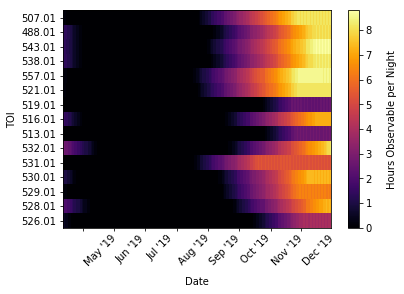

In [38]:
plot_observability(candidateTargets, constraints, CAHA, Time(earliestObs), Time(latestObs))

------------------------------